# Анализ данных интернет-магазина «Стримчик»

В нашем распоряжении данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Нам доступны данные за 2016 год о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Цель проекта - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Наша работа будет состоять из 6 шагов:

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод

В итоге работы мы получим информацию о том, какие факторы влияют на успешность игры на рынке. Составим портрет среднестатистического пользователя для каждого региона. Также мы подтвердим или опровергнем наши гипотезы.

## Шаг 1. Загрузка данных

In [1]:
#Импортируем все необходимые библиотеки.
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Откроем файл.
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В файле мы сможем посмотреть название каждой игры, платформу на которой была выпущена игра, год выпуска, жанр игры, продажи в Северной Америке, Европе, Японии и других странах, оценка критиков и пользователей, а также рейтинг от организации ESRB. 

Всего у нас 16715 строк с данными. У нас есть также пустые строки в параметрах: Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating. Кроме того нам средует привести данные в столбце Year_of_Release к к типу даты pandas, а данные в столбце User_Score привести к числовым после заполнения пропусков. 

## Шаг 2. Предобработка данных

1. Замените названия столбцов (приведите к нижнему регистру);

2. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

3. Обработайте пропуски при необходимости:

    1. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    2. Опишите причины, которые могли привести к пропускам;
    3. Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
    

4. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Заменим названия столбцов (приведём к нижнему регистру)

In [5]:
data.columns = data.columns.str.lower()
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### 2.2 и 2.3 Преобразуем данные в нужные типы и обработаем пропуски

In [6]:
#Проверим на наличие пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
#Для того, чтобы привести данные в столбце к числовым, нужно сперва заменить пропуски. 
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
#Заметили непонятные значения 'tbd' в количестве 2424 штук 
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [9]:
#Заменим значение tbd на пропуск nan
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Пропуски в столбце user_score и critic_score заполнять не будем, так как неизвестна оценка пользователей. На ноль заполнять некоректно, так как такая оценка тоже существует в рейтинге.

In [10]:
#Приведем данные в столбце user_score к числовым
data['user_score'] = data['user_score'].astype('float')

In [11]:
#Проверим на наличие пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [12]:
#Заменим пропуски в столбце name на 'без имени', так как возможно, что игра ещё не получила своё имя. 
data['name'] = data['name'].fillna('без имени')
#Заменим пропуски в столбце genre на 'без жанра', возможно игра не входит в уже существующие жарны. 
data['genre'] = data['genre'].fillna('без жанра')
#Заменим пропуски в столбце rating на 'RP', так как согласно информации из интернета это означает, что рейтинг ещё не присвоен.
data['rating'] = data['rating'].fillna('RP')
#Заменим пропуски в столбце year_of_release на '0', так как информации о релизи ещё не поступало. 
data['year_of_release'] = data['year_of_release'].fillna(2100)

In [13]:
#Приведем столбец year_of_release к типу даты pandas
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')

In [14]:
#Проверим на наличие дубликатов
data.duplicated().sum()

0

In [15]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

Явных дубликатов не обнаружено. 

### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [16]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,RP,30.26
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,RP,28.31


В ходе предобработки мы привели к нижнему регистру названия столбцов. Заменили пропущенные значения в столбцах name, genre, year_of_release и rating. А также изменили тип данных в столбце year_of_release на тип даты pandas и в столбце user_score на численные значения.

## Шаг 3. Исследовательский анализ данных

1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
4. Не учитывайте в работе данные за предыдущие годы.
5. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
6. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
7. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
8. Соотнесите выводы с продажами игр на других платформах.
9. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


###  Посмотрим, сколько игр выпускалось в разные годы.

In [17]:
data['year_of_release'].unique()

array(['2006-01-01T00:00:00.000000000', '1985-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1989-01-01T00:00:00.000000000',
       '1984-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '1999-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '1990-01-01T00:00:00.000000000',
       '1988-01-01T00:00:00.000000000', '2002-01-01T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '1992-01-01T00:00:00.000000000', '1997-01-01T00:00:00.000000000',
       '1993-01-01T00:00:00.000000000', '1994-01-01T00:00:00.000000000',
       '1982-01-01T00:00:00.000000000', '2016-01-01

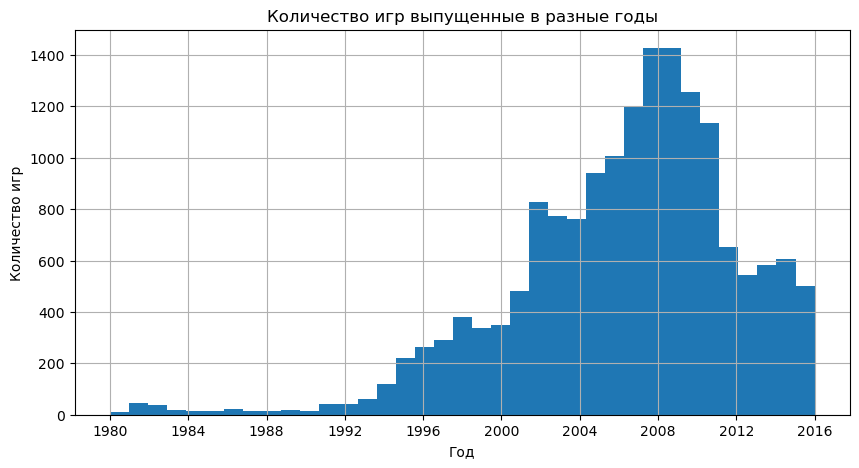

In [18]:
#Построим гистограмму для наглядного анализа и исключим из выборки 2100 год (год который мы установили у игр, в которых год выпуска ещё не известен).
data[data['year_of_release'] != '2100-01-01T00:00:00.000000000']['year_of_release'].hist(bins=37, figsize=(10,5)) 
plt.title("Количество игр выпущенные в разные годы")
plt.xlabel("Год")
plt.ylabel("Количество игр")
plt.show()

Судя по гистограмме игры начали выпускаться в 1980 году. В 90-е годы произошел всплеск выпуска игр, он продолжался и достиг своего пика в 2008 году. Далее с 2008 до 2016 года мы можем видеть спад развития игровой индустрии. В 2016 году игры выпускалось уже в три раза меньше чем в 2008 году. Данные за весь период показывают полное развитие игровой индустрии, поэтому они все для нас важны. 

### Посмотрим, как менялись продажи по платформам.

In [19]:
platform_sales = data.groupby('platform').agg({'total_sales':'count'})
platform_sales.sort_values(by='total_sales', ascending=False).head(5)

,total_sales
platform,
PS2,2161
DS,2151
PS3,1331
Wii,1320
X360,1262


В топ 5 наиболее популярных платформ входит: PS2, DS, PS3, Wii, X360. Рассмотрим распределение продаж игр по годам для этих платформ. 

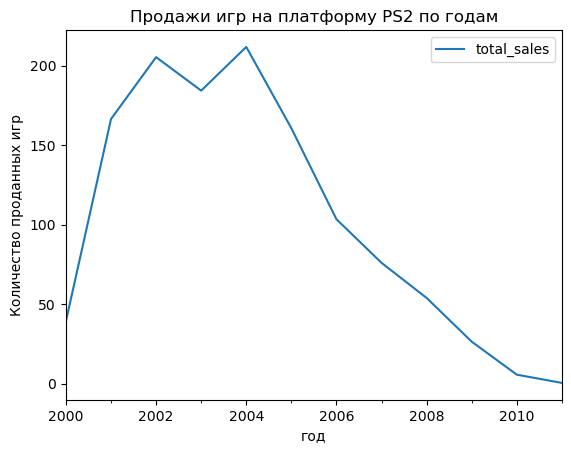

In [20]:
data[data['year_of_release'] != '2100-01-01T00:00:00.000000000'][data['platform'] == 'PS2'].groupby('year_of_release').agg({'total_sales':'sum'}).plot()
plt.title("Продажи игр на платформу PS2 по годам")
plt.xlabel("год")
plt.ylabel("Количество проданных игр")
plt.show()

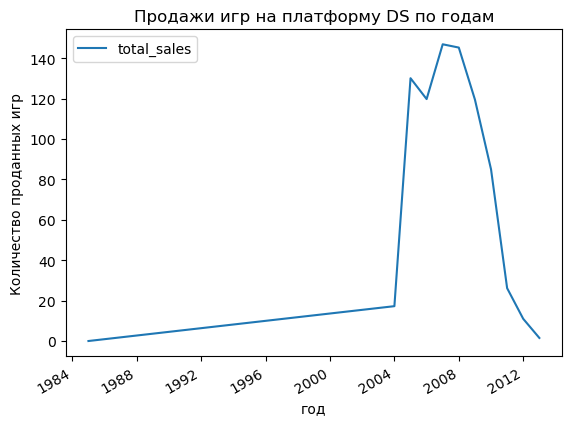

In [21]:
data[data['year_of_release'] != '2100-01-01T00:00:00.000000000'][data['platform'] == 'DS'].groupby('year_of_release').agg({'total_sales':'sum'}).plot()
plt.title("Продажи игр на платформу DS по годам")
plt.xlabel("год")
plt.ylabel("Количество проданных игр")
plt.show()

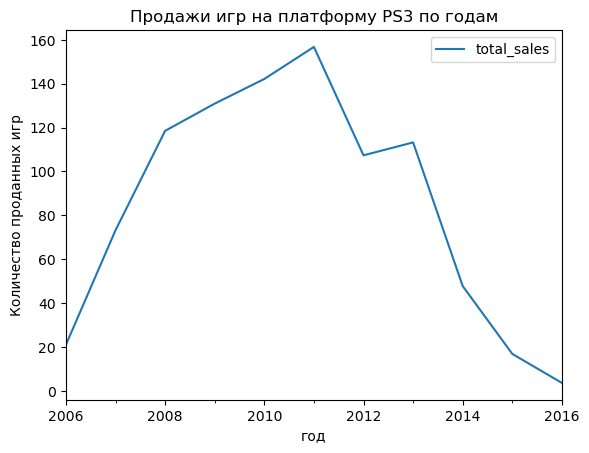

In [22]:
data[data['year_of_release'] != '2100-01-01T00:00:00.000000000'][data['platform'] == 'PS3'].groupby('year_of_release').agg({'total_sales':'sum'}).plot()
plt.title("Продажи игр на платформу PS3 по годам")
plt.xlabel("год")
plt.ylabel("Количество проданных игр")
plt.show()

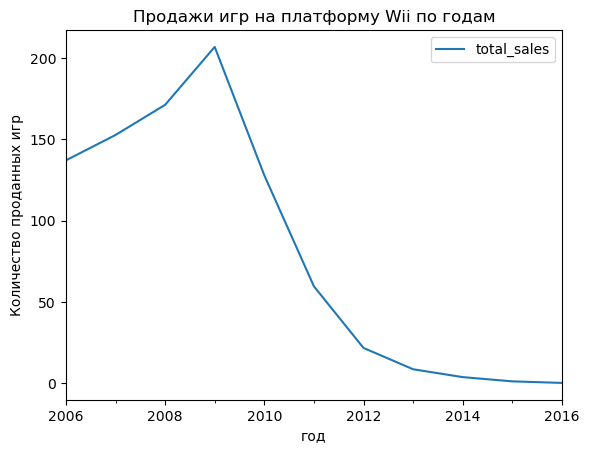

In [23]:
data[data['year_of_release'] != '2100-01-01T00:00:00.000000000'][data['platform'] == 'Wii'].groupby('year_of_release').agg({'total_sales':'sum'}).plot()
plt.title("Продажи игр на платформу Wii по годам")
plt.xlabel("год")
plt.ylabel("Количество проданных игр")
plt.show()

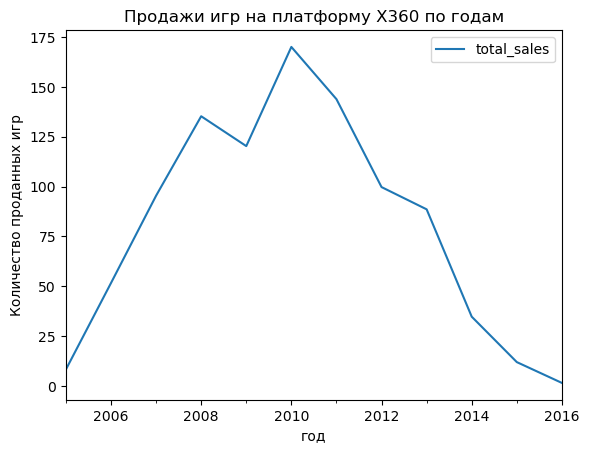

In [24]:
data[data['year_of_release'] != '2100-01-01T00:00:00.000000000'][data['platform'] == 'X360'].groupby('year_of_release').agg({'total_sales':'sum'}).plot()
plt.title("Продажи игр на платформу X360 по годам")
plt.xlabel("год")
plt.ylabel("Количество проданных игр")
plt.show()

Судя по графикам, платформы для игр успевают набрать популярность, быть на пике и утратить популярность в среднем за 8-10 лет. 

### Возьмём данные за актуальный период и не будем учитывать в работе данные за предыдущие годы.

In [25]:
#Возьмём данные за 2015 год, так как за 2016 год данные могуд быть ндостаточно заполненными. 
data_actual = data.query('year_of_release == "2015-01-01T00:00:00.000000000"')
data_actual.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98
99,Call of Duty: Black Ops 3,XOne,2015-01-01,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,RP,7.39
105,Fallout 4,PS4,2015-01-01,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
231,Uncharted: The Nathan Drake Collection,PS4,2015-01-01,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
242,Halo 5: Guardians,XOne,2015-01-01,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
247,Splatoon,WiiU,2015-01-01,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,4.44
270,Fallout 4,XOne,2015-01-01,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
303,The Witcher 3: Wild Hunt,PS4,2015-01-01,Role-Playing,1.02,2.13,0.23,0.59,92.0,9.2,M,3.97


### Рассмотрим какие платформы лидируют по продажам, растут или падают.

In [26]:
platform_sales_actual = data_actual.groupby('platform').agg({'total_sales':'count'})
platform_sales_actual.sort_values(by='total_sales', ascending=False).head(5)

,total_sales
platform,
PS4,137
PSV,110
3DS,86
XOne,80
PS3,73


Наиболее популярными платформами для игр в 2015 году были PS4, PSV, 3DS, XOne и PS3. Для того чтобы посмотреть будут ли они популярны в 2017 году нам нужно рассмотреть графики продаж за последнее время. 

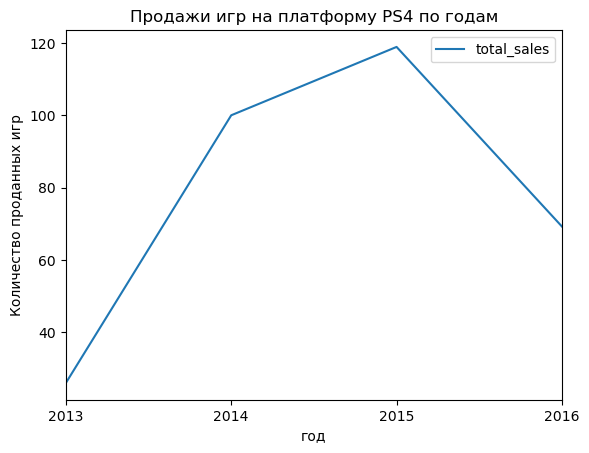

In [27]:
data[data['year_of_release'] != '2100-01-01T00:00:00.000000000'][data['platform'] == 'PS4'].groupby('year_of_release').agg({'total_sales':'sum'}).plot()
plt.title("Продажи игр на платформу PS4 по годам")
plt.xlabel("год")
plt.ylabel("Количество проданных игр")
plt.show()

Судя по графику продажи игр на PS4 всё ещё будут популярны, так как платформа выпущена в 2013 году. Поэтому спад популярности этой платформы скорее всего будет в 2021-2023 годах. 

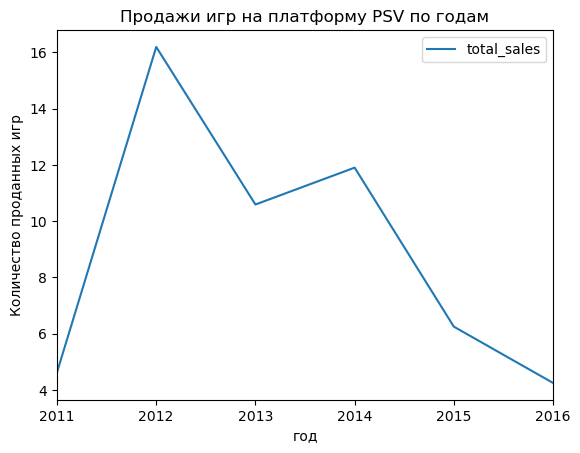

In [28]:
data[data['year_of_release'] != '2100-01-01T00:00:00.000000000'][data['platform'] == 'PSV'].groupby('year_of_release').agg({'total_sales':'sum'}).plot()
plt.title("Продажи игр на платформу PSV по годам")
plt.xlabel("год")
plt.ylabel("Количество проданных игр")
plt.show()

Судя по графику продажи игр на PSV скорее всего уже не будет популярна в 2017 году, так как мы наблюдаем тенденцию на спад прожах игр на эту платформу.

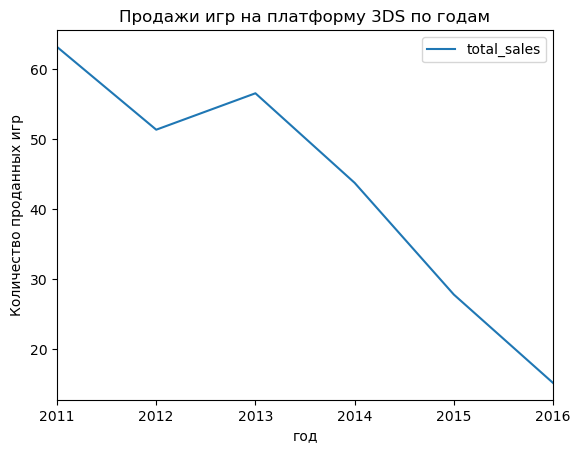

In [29]:
data[data['year_of_release'] != '2100-01-01T00:00:00.000000000'][data['platform'] == '3DS'].groupby('year_of_release').agg({'total_sales':'sum'}).plot()
plt.title("Продажи игр на платформу 3DS по годам")
plt.xlabel("год")
plt.ylabel("Количество проданных игр")
plt.show()

Судя по графику продажи игр на 3DS скорее всего уже не будет популярна в 2017 году, так как мы наблюдаем тенденцию на спад прожах игр на эту платформу.

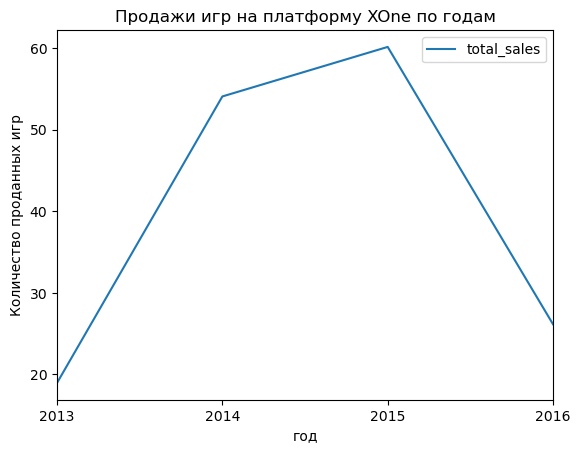

In [30]:
data[data['year_of_release'] != '2100-01-01T00:00:00.000000000'][data['platform'] == 'XOne'].groupby('year_of_release').agg({'total_sales':'sum'}).plot()
plt.title("Продажи игр на платформу XOne по годам")
plt.xlabel("год")
plt.ylabel("Количество проданных игр")
plt.show()

Судя по графику продажи игр на XOne всё ещё будут популярны, так как платформа выпущена в 2013 году. Поэтому спад популярности этой платформы скорее всего будет в 2021-2023 годах. 

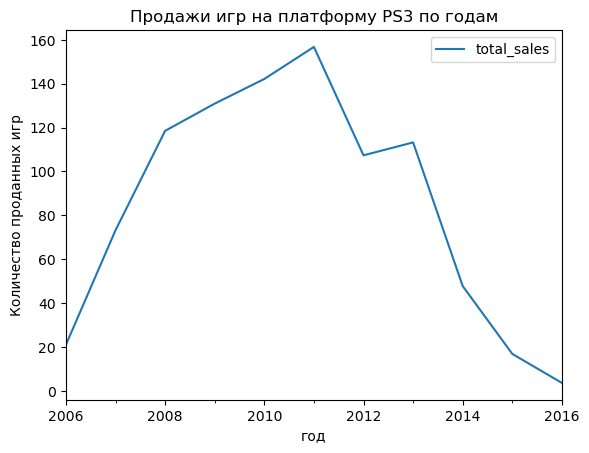

In [31]:
data[data['year_of_release'] != '2100-01-01T00:00:00.000000000'][data['platform'] == 'PS3'].groupby('year_of_release').agg({'total_sales':'sum'}).plot()
plt.title("Продажи игр на платформу PS3 по годам")
plt.xlabel("год")
plt.ylabel("Количество проданных игр")
plt.show()

Судя по графику продажи игр на PS3 уже будут не так популярны. Платформа выпущена в 2006 году, к тому же у неё появилась более новая версия PS4 которая только набирает популярность. 

Судя по графикам в 2017 году будут популярны игры на платформы PS4 и XOne. Они скорее всего принесут наибольшее количество прибыли в 2017 году, так как выходят на пик своей попуряности. 

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [32]:
#Создадим переменную с нужными нам платформами
data_platform = data_actual.loc[data_actual['platform'].isin(['PS4', 'PSV', '3DS', 'XOne', 'PS3'])]
data_platform['platform'].unique()

array(['PS4', 'XOne', '3DS', 'PS3', 'PSV'], dtype=object)

In [33]:
#Избавимся от большенства выбросов. 
data_platform = data_platform[data_platform['total_sales']<2]

In [34]:
data_platform['total_sales'].describe()

count    456.000000
mean       0.232939
std        0.355110
min        0.010000
25%        0.030000
50%        0.080000
75%        0.252500
max        1.920000
Name: total_sales, dtype: float64

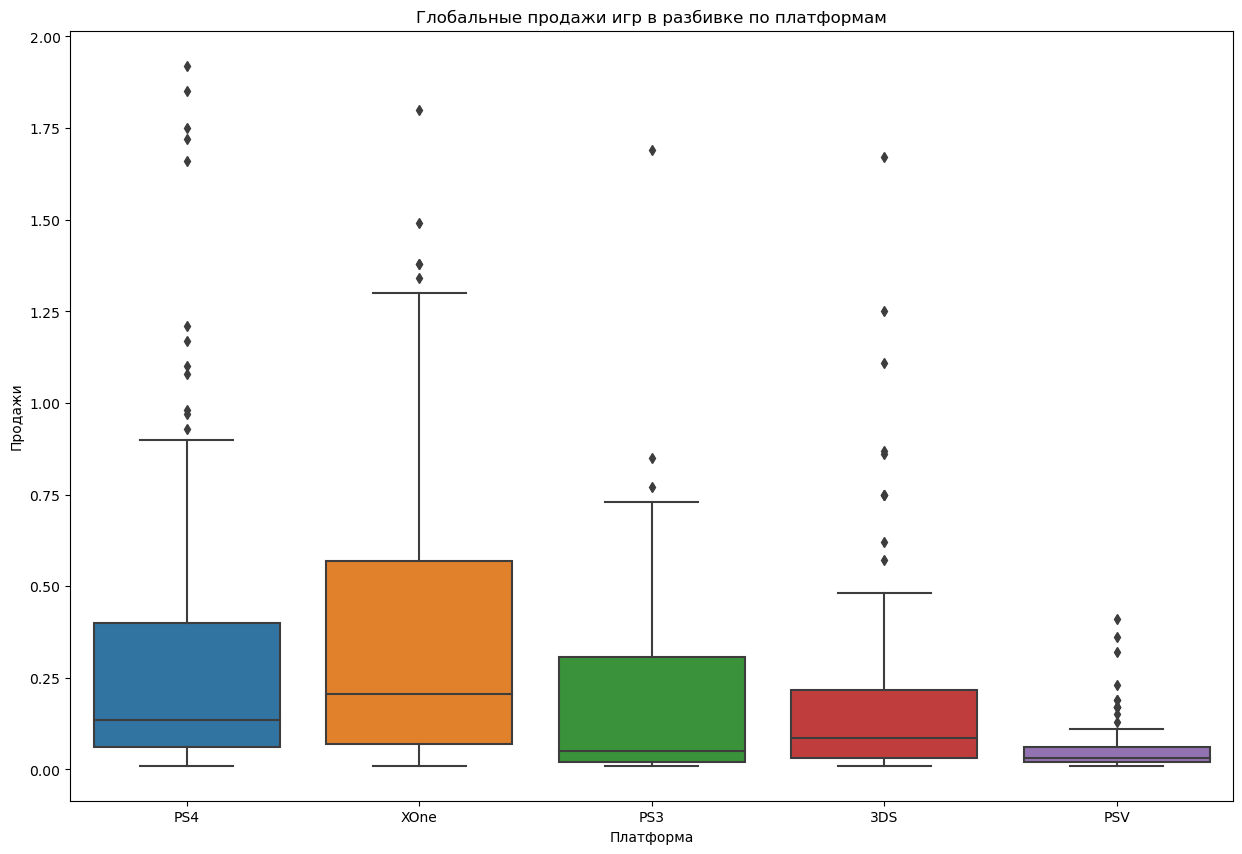

In [35]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_platform, x='platform', y='total_sales')
plt.title("Глобальные продажи игр в разбивке по платформам")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.show()

In [36]:
data_platform['year_of_release'].describe()

count                     456
unique                      1
top       2015-01-01 00:00:00
freq                      456
first     2015-01-01 00:00:00
last      2015-01-01 00:00:00
Name: year_of_release, dtype: object

Почти на каждой платформе есть игры которые нриносят большее количество прибыли. Но также есть и игры которые продаются не так активно. Больше всего за 2015 год продаются игры на XOne и PS4, далее идут PS3, 3DS и PSV.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [37]:
#Рассмотрим самую популярную платформу XOne
XOne_data = data.query('platform == "XOne"')
XOne_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015-01-01,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,RP,7.39
165,Grand Theft Auto V,XOne,2014-01-01,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014-01-01,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015-01-01,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015-01-01,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


In [38]:
# Создадим таблицу, в котрой указаны топ 5 игр платформы по продажам и их рейтинг. 
XOne_critic = XOne_data.loc[:,['total_sales', 'critic_score', 'user_score']]
XOne_critic.sort_values(by='total_sales', ascending=False).head(5)

,total_sales,critic_score,user_score
99,7.39,NaN,NaN
165,5.47,97.0,7.9
179,5.26,81.0,5.4
242,4.49,84.0,6.4
270,4.22,88.0,6.2


In [39]:
#Посчитаем корреляцию между между отзывами и продажами.
XOne_critic.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


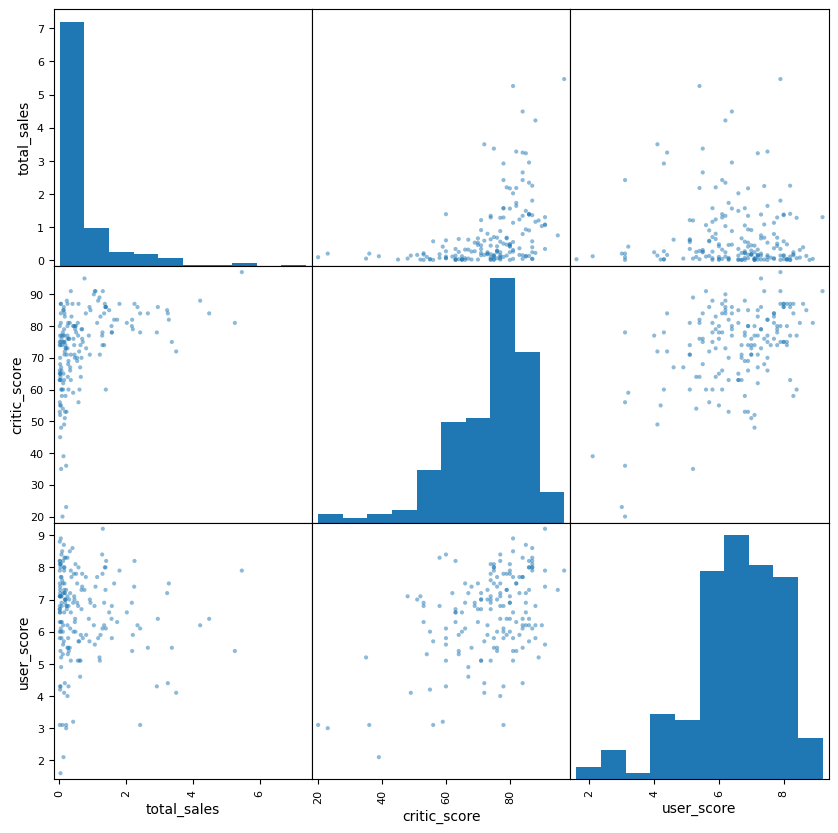

In [40]:
#Построим диаграмму рассеивания. 
pd.plotting.scatter_matrix(XOne_critic, figsize=(10, 10))
plt.show()

Судя по данным существует корреляция между оценками критиков и продажами игр на XOne. Корреляция между оценками потребителей и продажами равна -0.06, значит показатели не зависимы друг от друга. Также мы можем заметить что корреляция между оценками критиков и оценками пользователей равна 0.5, рейтинг критиков сильно влияет на то, какой рейтинг поставят игре пользователи. 

### Соотнесём выводы с продажами игр на других платформах.

In [41]:
#Рассмотрим платформу PS4
ps4_data = data.query('platform == "PS4"')
ps4_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98
92,Call of Duty: Advanced Warfare,PS4,2014-01-01,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [42]:
# Создадим таблицу, в котрой указаны топ 5 игр платформы по продажам и их рейтинг. 
ps4_critic = ps4_data.loc[:,['total_sales', 'critic_score', 'user_score']]
ps4_critic.sort_values(by='total_sales', ascending=False).head(5)

,total_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7


In [43]:
#Посчитаем корреляцию между между отзывами и продажами.
ps4_critic.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


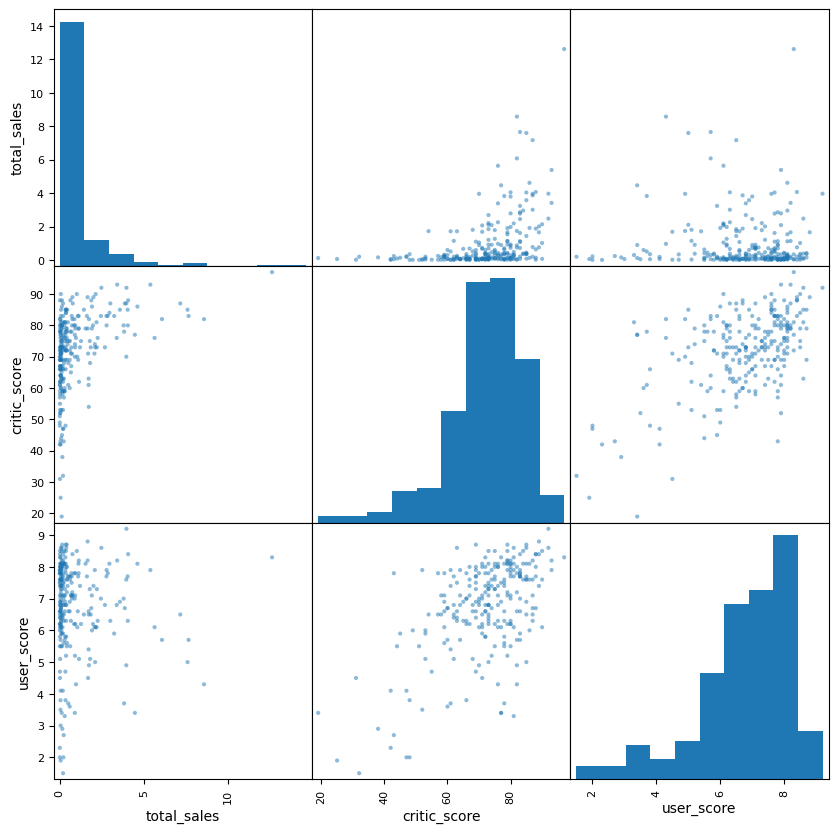

In [44]:
#Построим диаграмму рассеивания. 
pd.plotting.scatter_matrix(ps4_critic, figsize=(10, 10))
plt.show()

Корреляция между продажами игр на ps4 и оценками критиков равна 0.4, такой показатель означает, что зависимость между данными параметрами есть, но не сильная. Зависисмость между оценками пользователей и продажами отрицательная и минимальна, т. е. её по сути нет. Корреляция между оценками критиков и оценками пользователей равна 0.5. 

In [45]:
#Рассмотрим платформу PS3
ps3_data = data.query('platform == "PS3"')
ps3_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012-01-01,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011-01-01,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010-01-01,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010-01-01,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70


In [46]:
# Создадим таблицу, в котрой указаны топ 5 игр платформы по продажам и их рейтинг. 
ps3_critic = ps3_data.loc[:,['total_sales', 'critic_score', 'user_score']]
ps3_critic.sort_values(by='total_sales', ascending=False).head(5)

,total_sales,critic_score,user_score
16,21.05,97.0,8.2
34,13.79,83.0,5.3
37,13.33,88.0,3.2
41,12.63,88.0,6.4
54,10.70,84.0,7.5


In [47]:
#Посчитаем корреляцию между между отзывами и продажами.
ps3_critic.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.432432,0.126691
critic_score,0.432432,1.000000,0.629005
user_score,0.126691,0.629005,1.000000


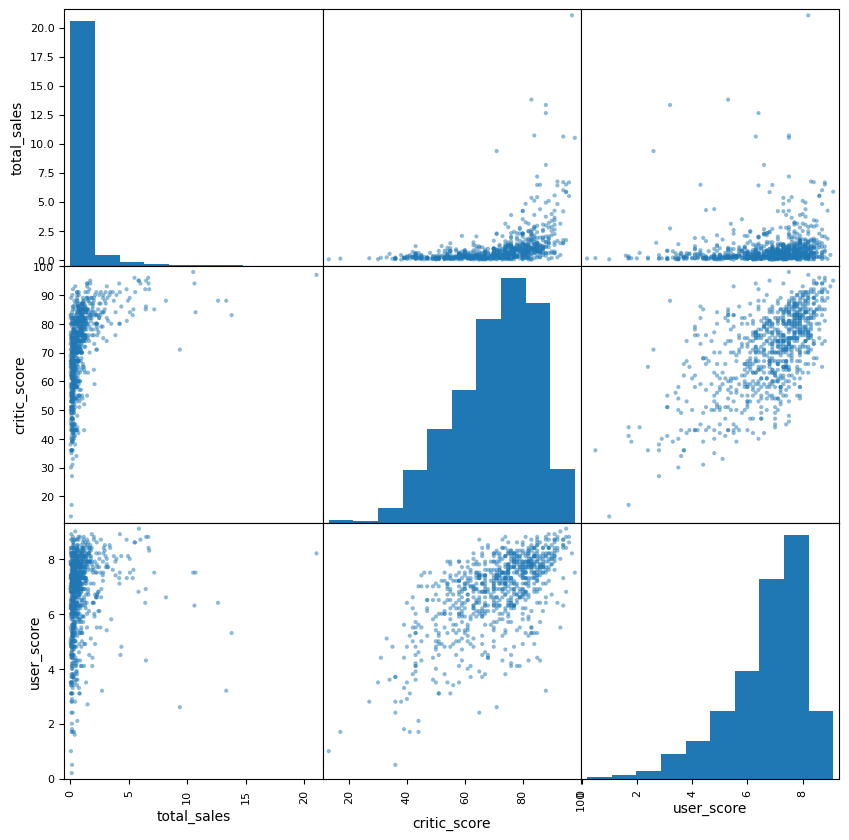

In [48]:
#Построим диаграмму рассеивания. 
pd.plotting.scatter_matrix(ps3_critic, figsize=(10, 10))
plt.show()

Корреляция между продажами игр на ps3 и оценками критиков равна 0.4, такой показатель означает, что зависимость между данными параметрами есть, но не сильная. Зависисмость между оценками пользователей и продажами минимальна, равна 0.1, т. е. её по сути нет. Корреляция между оценками критиков и оценками пользователей равна 0.6. 

In [49]:
#Рассмотрим платформу 3DS
platform_3DS_data = data.query('platform == "3DS"')
platform_3DS_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
40,Mario Kart 7,3DS,2011-01-01,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
53,Super Mario 3D Land,3DS,2011-01-01,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E,10.81
62,New Super Mario Bros. 2,3DS,2012-01-01,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


In [50]:
# Создадим таблицу, в котрой указаны топ 5 игр платформы по продажам и их рейтинг. 
platform_3DS_critic = platform_3DS_data.loc[:,['total_sales', 'critic_score', 'user_score']]
platform_3DS_critic.sort_values(by='total_sales', ascending=False).head(5)

,total_sales,critic_score,user_score
33,14.60,NaN,NaN
40,12.65,85.0,8.2
47,11.68,NaN,NaN
53,10.81,90.0,8.4
62,9.90,78.0,7.2


In [51]:
#Посчитаем корреляцию между между отзывами и продажами.
platform_3DS_critic.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.349401,0.224808
critic_score,0.349401,1.000000,0.744168
user_score,0.224808,0.744168,1.000000


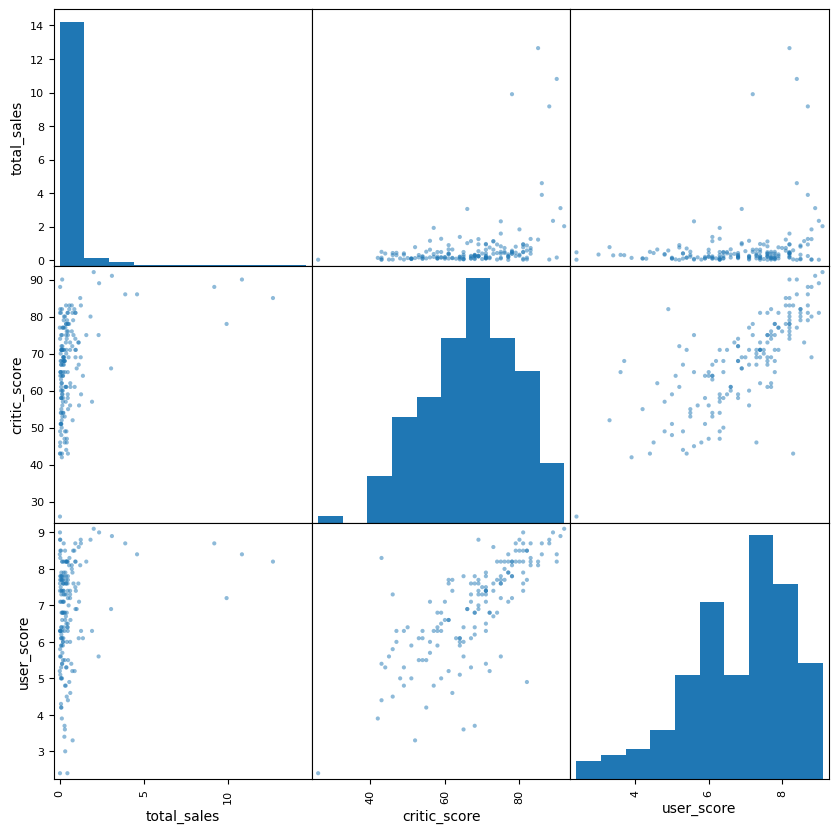

In [52]:
#Построим диаграмму рассеивания. 
pd.plotting.scatter_matrix(platform_3DS_critic, figsize=(10, 10))
plt.show()

Корреляция между продажами игр на 3DS и оценками критиков равна 0.3, такой показатель означает, что зависимость между данными параметрами есть, но не сильная. Зависисмость между оценками пользователей и продажами незначительная, равна 0.2. Корреляция между оценками критиков и оценками пользователей высокая, равна 0.7. 

In [53]:
#Рассмотрим платформу PSV
PSV_data = data.query('platform == "PSV"')
PSV_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
868,Minecraft,PSV,2014-01-01,Misc,0.18,0.64,0.90,0.24,NaN,NaN,RP,1.96
1219,Uncharted: Golden Abyss,PSV,2011-01-01,Shooter,0.53,0.66,0.13,0.22,80.0,7.4,T,1.54
1294,Call of Duty Black Ops: Declassified,PSV,2012-01-01,Action,0.71,0.43,0.07,0.26,33.0,4.8,M,1.47
1485,Assassin's Creed III: Liberation,PSV,2012-01-01,Action,0.53,0.48,0.06,0.24,70.0,7.2,M,1.31
1595,LittleBigPlanet PS Vita,PSV,2012-01-01,Platform,0.35,0.61,0.02,0.27,88.0,8.6,E,1.25


In [54]:
# Создадим таблицу, в котрой указаны топ 5 игр платформы по продажам и их рейтинг. 
PSV_critic = PSV_data.loc[:,['total_sales', 'critic_score', 'user_score']]
PSV_critic.sort_values(by='total_sales', ascending=False).head(5)

,total_sales,critic_score,user_score
868,1.96,NaN,NaN
1219,1.54,80.0,7.4
1294,1.47,33.0,4.8
1485,1.31,70.0,7.2
1595,1.25,88.0,8.6


In [55]:
#Посчитаем корреляцию между между отзывами и продажами.
PSV_critic.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.131517,0.013580
critic_score,0.131517,1.000000,0.733471
user_score,0.013580,0.733471,1.000000


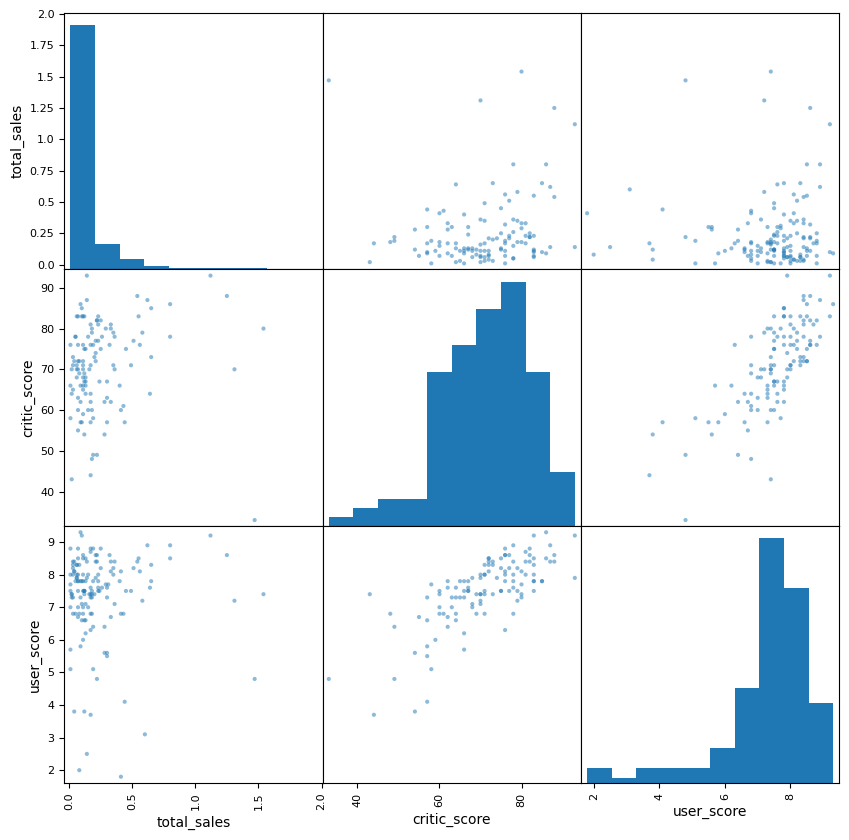

In [56]:
#Построим диаграмму рассеивания. 
pd.plotting.scatter_matrix(PSV_critic, figsize=(10, 10))
plt.show()

Корреляция между продажами игр на PSV и оценками критиков равна 0.1, такой показатель означает, что зависимости между данными параметрами практически нет. Зависисмости между оценками пользователей и продажами нет, корреляция равна 0.01. Корреляция между оценками критиков и оценками пользователей высокая, равна 0.7. 

В целом наблюдается прямая зависимость между оценками критиков и продажами и высокая зависимость между оценками критиков и оценками пользователей. Зависимости между оценками пользователей и продажами нет. 

### Посмотрим на общее распределение игр по жанрам

In [57]:
# Создадим таблицу, в котрой указаны топ 5 жанров игр. 
popular_genre = data.groupby('genre').agg({'name':'count'})
popular_genre.sort_values(by='name', ascending=False).head(10)

,name
genre,
Action,3369
Sports,2348
Misc,1750
Role-Playing,1498
Shooter,1323
Adventure,1303
Racing,1249
Platform,888
Simulation,873


In [58]:
# Создадим таблицу, в котрой указаны топ 5 игр платформы по продажам и их жанр.
popular_genre_sales = data.groupby('genre').agg({'total_sales':'median'})
popular_genre_sales.sort_values(by='total_sales', ascending=False).head(10)

,total_sales
genre,
без жанра,1.21
Platform,0.27
Shooter,0.24
Sports,0.22
Fighting,0.21
Action,0.19
Racing,0.19
Role-Playing,0.18
Misc,0.16


Наибелее популярным жанром среди создателей игр является Action. На втором месте спорт, а на третьем Misc.
Однако, если смотреть по продажам, самые продаваемые игры в жанре Platform, Shooter и Sports. Также мы видим в топе продаж игры без жанра, но их не будем рассматривать так как не известны какие жанры продавались. 

### Проведя подробный анализ данных, мы можем сделать выводы:
1. Игры начали выпускаться в 1980 году. В 90-е годы произошел всплеск выпуска игр и продолжался вплоть до 2008 года, далее произошел спад. 
2.  В топ 5 наиболее популярных платформ за всё время игровой индустрии входят: PS2, DS, PS3, Wii, X360.  
3. Платформы для игр успевают набрать популярность, быть на пике и утратить популярность в среднем за 8-10 лет. 
4. Наиболее популярными платформами для игр в 2015 году были PS4, PSV, 3DS, XOne и PS3. 
5. В 2017 году будут популярны игры на платформы PS4 и XOne. Они скорее всего принесут наибольшее количество прибыли в 2017 году, так как выходят на пик своей популярности. Остальные платформы будут всё менее популярны среди пользователей. 
6. Больше всего за последние 10 лет продаются игры на PS3 и X360, далее идут PS4, 3DS и PSV.
7. Существует прямая зависимость между оценками критиков и продажами и высокая зависимость между оценками критиков и оценками пользователей. Зависимости между оценками пользователей и продажами нет.
8. Жанры Action, Sport и Misc чаще всего выпускаются компаниями. Однако, пользователи чаще покупают игры в жанре Platform, Shooter и Sports.

## Шаг 4. Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясните разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

В анализе рейтингов уже включены игры без рейтингов. В ESRB игры, которыем ещё не поставлен рейтинг отмечают RP, поэтому в данных где не был указан рейтинг я поставила отметку RP.

### Топ-5 платформ для пользователя каждого региона (NA, EU, JP)

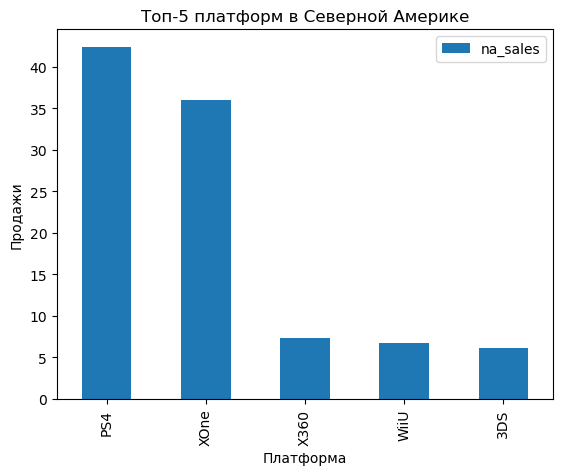

In [59]:
#Построим гистограмму показывающую топ-5 платформ для пользователя Северной Америки. 
data_actual.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.title("Топ-5 платформ в Северной Америке")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.show()

Топ-5 платформ для пользователей из Северной Америки за всё время существования игр:
1. PS4
2. XOne
3. X360
4. WiiU
5. 3DS

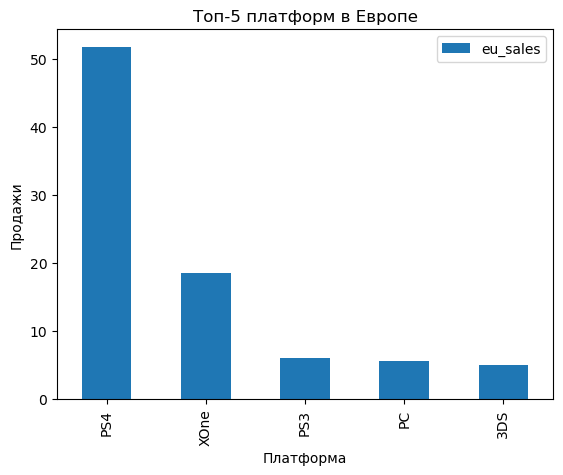

In [60]:
#Построим гистограмму показывающую топ-5 платформ для пользователя Европы. 
data_actual.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title("Топ-5 платформ в Европе")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.show()

Топ-5 платформ для пользователей из Европы за всё время существования игр:
1. PS4
2. XOne PS3
3. PS3
4. PC
5. 3DC

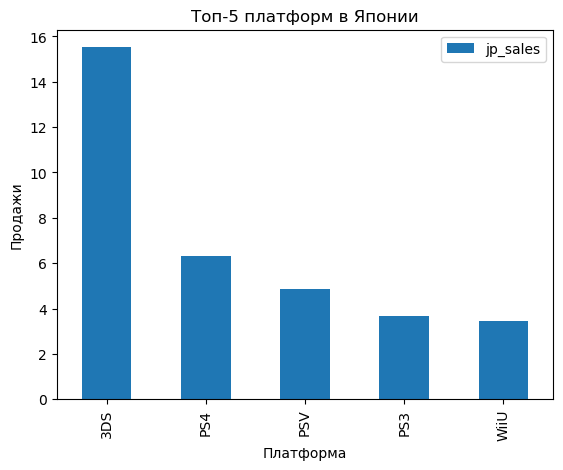

In [61]:
#Построим гистограмму показывающую топ-5 платформ для пользователя Японии. 
data_actual.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.title("Топ-5 платформ в Японии")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.show()

Топ-5 платформ для пользователей из Японии за всё время существования игр:
1. 3DS
2. PS4
3. PSV
4. PS3
5. WiiU

Топ-5 платформ для Японии значительно отличается чем для Европы и Северной Америки. 

Посмотрим Топ-5 платформ для всего мира. 

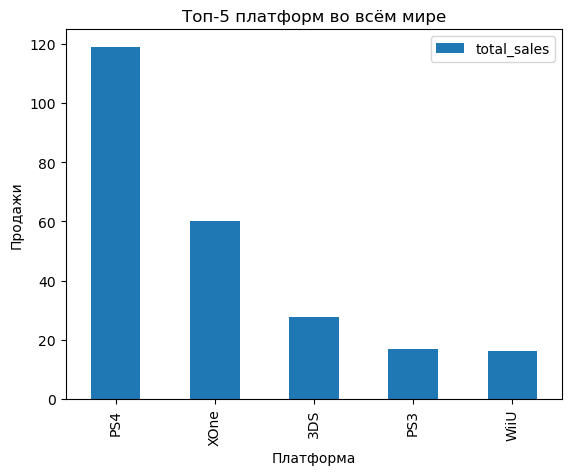

In [62]:
#Посмотрим Топ-5 платформ для всего мира. 
data_actual.groupby(by='platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head(5).plot(kind='bar')
plt.title("Топ-5 платформ во всём мире")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.show()

Топ-5 платформ для пользователей из всего мира:
1. PS4
2. XOne
3. 3DS
4. PS3
5. WiiU

### Топ-5 жанров для пользователя каждого региона (NA, EU, JP)

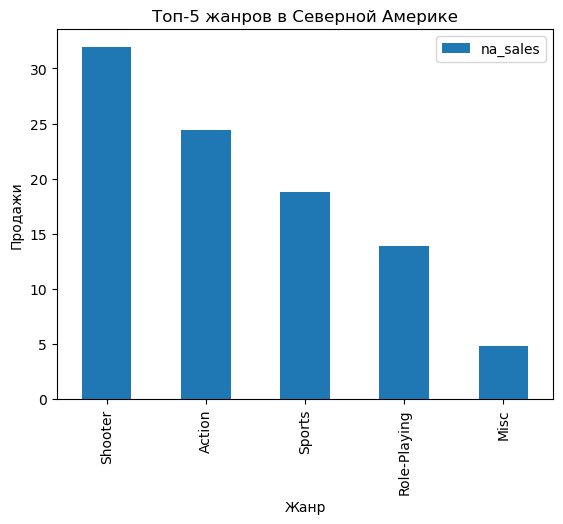

In [63]:
#Построим гистограмму показывающую топ-5 жанров для пользователя Северной Америки. 
data_actual.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.title("Топ-5 жанров в Северной Америке")
plt.xlabel("Жанр")
plt.ylabel("Продажи")
plt.show()

Топ-5 жанров для пользователей из Северной Америки:
1. Shooter
2. Action
3. Sport 
4. Role-Playing
5. Misc

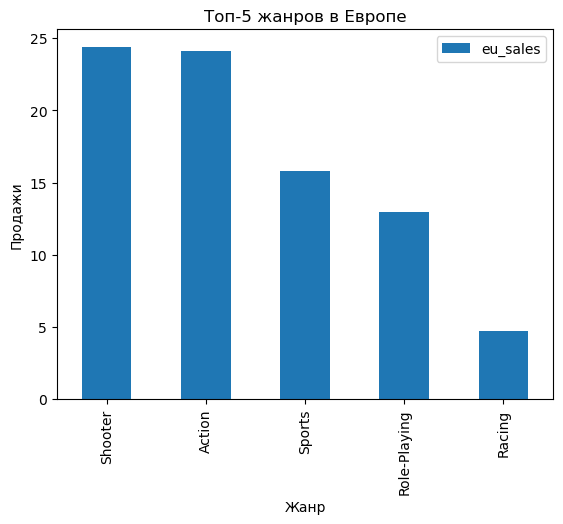

In [64]:
#Построим гистограмму показывающую топ-5 жанров для пользователя Европы. 
data_actual.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title("Топ-5 жанров в Европе")
plt.xlabel("Жанр")
plt.ylabel("Продажи")
plt.show()

Топ-5 жанров для пользователей из Европы:
1. Shooter
2. Action
3. Sport 
4. Role-Playing
5. Racing

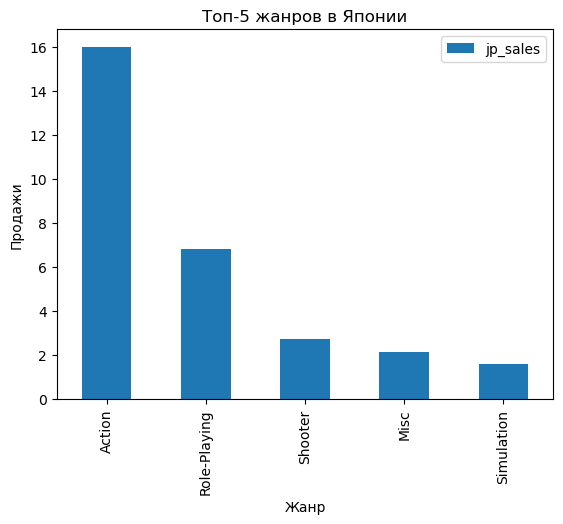

In [65]:
#Построим гистограмму показывающую топ-5 жанров для пользователя Японии. 
data_actual.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plt.title("Топ-5 жанров в Японии")
plt.xlabel("Жанр")
plt.ylabel("Продажи")
plt.show()

Топ-5 жанров для пользователей из Японии:
1. Action
2. Role-Playing
3. Shooter 
4. Misc
5. Simulation

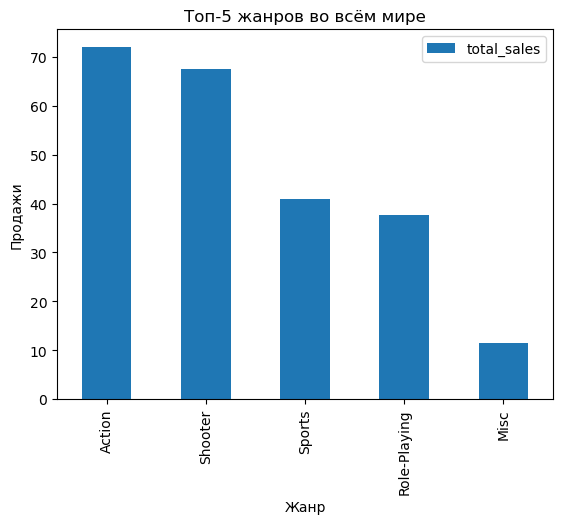

In [66]:
#Посмотрим Топ-5 жанров для всего мира. 
data_actual.groupby(by='genre').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head(5).plot(kind='bar')
plt.title("Топ-5 жанров во всём мире")
plt.xlabel("Жанр")
plt.ylabel("Продажи")
plt.show()

Топ-5 жанров для пользователей из всего мира:
1. Action
2. Shooter  
3. Sport 
4. Role-Playing
5. Misc

###  Влияет ли рейтинг ESRB на продажи в отдельном регионе?

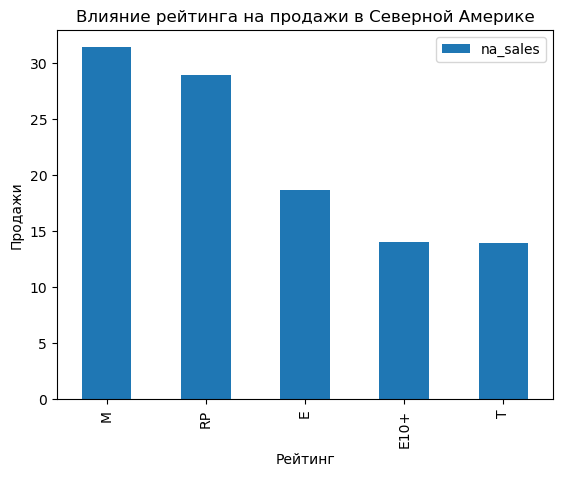

In [67]:
#Построим гистограмму показывающую влияние рейтинга на продажи в Северной Америке. 
data_actual.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).plot(kind='bar')
plt.title("Влияние рейтинга на продажи в Северной Америке")
plt.xlabel("Рейтинг")
plt.ylabel("Продажи")
plt.show()

Судя по графику в Северной Америке в основсном продаются игры с рейтингом M, он предназначен для детей старше 17 лет. Далее срледуют рейтинги RP, E, E10+ и T. Данные игры подходят в основсном для всех детей. 

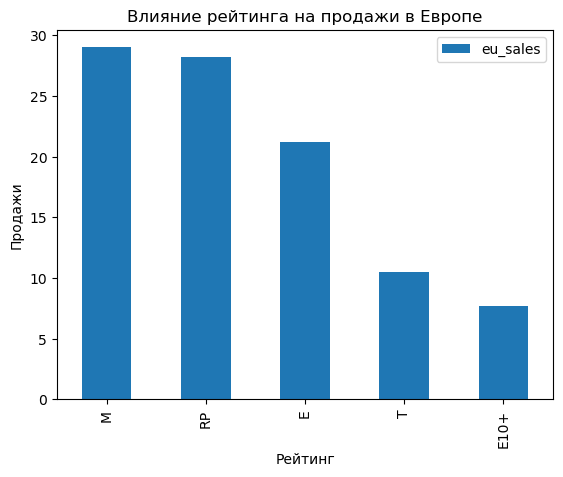

In [68]:
#Построим гистограмму показывающую влияние рейтинга на продажи в Европе. 
data_actual.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).plot(kind='bar')
plt.title("Влияние рейтинга на продажи в Европе")
plt.xlabel("Рейтинг")
plt.ylabel("Продажи")
plt.show()

В Европе также как и в Америке популярны игры с рейтингом M, RP, E и T. 

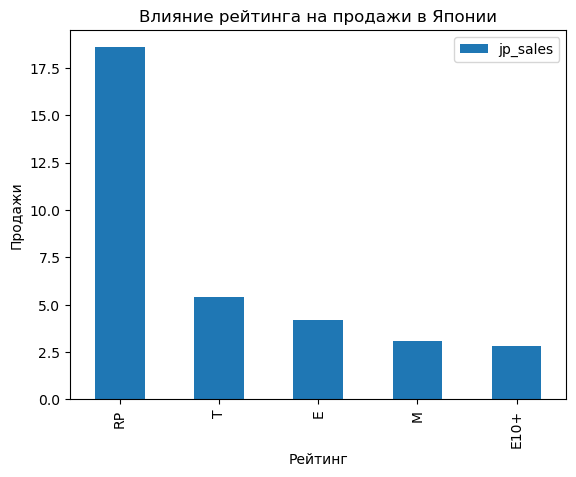

In [69]:
#Построим гистограмму показывающую влияние рейтинга на продажи в Японии. 
data_actual.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).plot(kind='bar')
plt.title("Влияние рейтинга на продажи в Японии")
plt.xlabel("Рейтинг")
plt.ylabel("Продажи")
plt.show()

В Японии в основном продаются игры, которым ещё не был присвоен рейтинг(RP). Возможно это связанно с тем, что игры для Японии гораздо позже рейтингуются игры ассоциацией, которая находится в США. Также в Японии популярны игры с рейтингом T, E и M. 

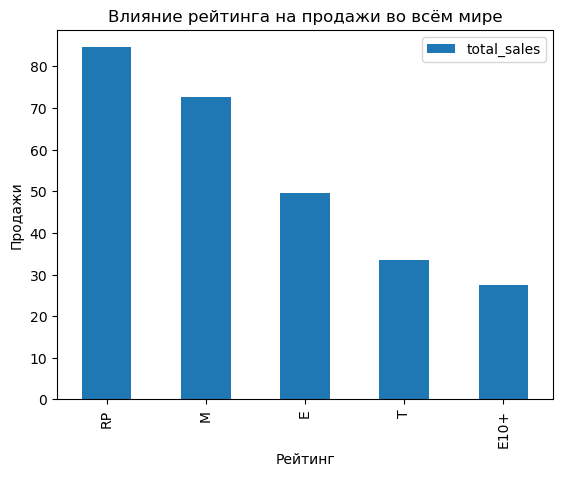

In [70]:
#Построим гистограмму показывающую влияние рейтинга на продажи в мире. 
data_actual.groupby(by='rating').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).plot(kind='bar')
plt.title("Влияние рейтинга на продажи во всём мире")
plt.xlabel("Рейтинг")
plt.ylabel("Продажи")
plt.show()

В мире в основном продаются игры без рейтинга(RP), игры с рейтингом, который подходят лицам, старше 17 лет(M), всем пользователям(E), игры для детей старше 13 лет(T). 

In [71]:
#Для того чтобы нам легче было анализировать данные по рейтингам, создадим таблицу с описанием рейтингов. 
data['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

In [72]:
list_values = ['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC']
list_index = ['Подходит для всех возрастных категорий', 'Категория ещё не присвоена', 'Подходит для лиц старше 17 лет', 'Подходит для лиц старше 13 лет', 'Подходит для лиц старше 10 лет', 'Для детей старше 6 лет и взрослых', 'Подходит для взрослых старше 18 лет', 'Для детей младшего возраста'] 
table_rating = pd.DataFrame(list(zip(list_values, list_index)), columns = ['Рейтинг', 'Описание']) 
table_rating

,Рейтинг,Описание
0,E,Подходит для всех возрастных категорий
1,RP,Категория ещё не присвоена
2,M,Подходит для лиц старше 17 лет
3,T,Подходит для лиц старше 13 лет
4,E10+,Подходит для лиц старше 10 лет
5,K-A,Для детей старше 6 лет и взрослых
6,AO,Подходит для взрослых старше 18 лет
7,EC,Для детей младшего возраста


 Портрет пользователя в Северной Америке: Скорее всего пользователь будет использовать платформу PS4 или XOne, будет выбирать игру с жанром 	Shooter или Action, рейтинг скорее всего будет иметь влияение и пользователь скорее выберет игру с ограничением 17+ или без ограничений.
 
Портрет пользователя в Европе: Пользователь в Европе будет играть на платформе PS4 или XOne в жанре Shooter или Action с рейтингом M или RP. 

Портрет пользователя в Японии: Японец скорее выберет игру на 3DS или PS4 с жанром Role-Playing или Action, скорее всего рейтинг у игры не будет присвоен или с рейтингом T. 

Портрет пользователя в Мире: В среднем по всему миру люди выбирают платформу PS4 или XOne, жанр Shooter или Action, а рейтинг RP или M.

## Шаг 5. Проверка гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
1. Как вы сформулировали нулевую и альтернативную гипотезы;
2. Какой критерий применили для проверки гипотез и почему.

### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотезы независимы между собой, значит нам следует использовать тест Стьюдента. 

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.

Пороговое значение alpha = 0.05

In [73]:
alpha = 0.05

#Сохраним в переменных xone и ps данные, в которых есть хоть какая то оценка пользователя. 
xone = data_actual[(data_actual['platform'] == 'XOne') & (data_actual['user_score'] > 0)]['user_score']
pc = data_actual[(data_actual['platform'] == 'PC') & (data_actual['user_score'] > 0)]['user_score']

#Посчитаем среднюю оценку пользователей для игр обеих платформ. 
print('Средняя оценка пользователей для игр на XOne: ', xone.mean())
print('Средняя оценка пользователей для игр на PC: ', pc.mean())

#Проведем проверку нашей гипотезы при помощи метода ttest_ind
result = st.ttest_ind(xone, pc)

print('p-значение =', result.pvalue)
if result.pvalue < alpha:
    print ('Отвергаем нулевую гипотеву')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

Средняя оценка пользователей для игр на XOne:  6.474545454545456
Средняя оценка пользователей для игр на PC:  6.294871794871794
p-значение = 0.585220163714934
Не получилось отвергнуть нулевую гипотезу


Наша гипотеза опровержена, средние пользовательские рейтинги платформ Xbox One и PC разные. Это также подтверждают наши подсчёты средней оценки пользователей для платформ Xbox One и PC.

### Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотезы независимы между собой, значит нам следует использовать тест Стьюдента. 

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

Пороговое значение alpha = 0.05

In [74]:
alpha = 0.05

#Сохраним в переменных xone и ps данные, в которых есть хоть какая то оценка пользователя. 
action = data_actual[(data_actual['genre'] == 'Action') & (data_actual['user_score'] > 0)]['user_score']
sports = data_actual[(data_actual['genre'] == 'Sports') & (data_actual['user_score'] > 0)]['user_score']

#Посчитаем среднюю оценку пользователей для игр обеих платформ. 
print('Средняя оценка пользователей для игр в жанре экшн: ', action.mean())
print('Средняя оценка пользователей для игр в жанре спорт: ', sports.mean())

#Проведем проверку нашей гипотезы при помощи метода ttest_ind
result = st.ttest_ind(action, sports)

print('p-значение =', result.pvalue)
if result.pvalue < alpha:
    print ('Отвергаем нулевую гипотеву')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

Средняя оценка пользователей для игр в жанре экшн:  6.941666666666666
Средняя оценка пользователей для игр в жанре спорт:  5.006666666666668
p-значение = 5.954050662075536e-12
Отвергаем нулевую гипотеву


Наша гипотеза опровержена, средние пользовательские рейтинги жанров Action и Sports разные. Это также подтверждают наши подсчёты средней оценки пользователей для игр в жанре Action и Sports.

## Шаг 6. Общий вывод

В ходе предобработки мы заменили пропущенные значения, изменили тип данных и привели названия столбцов к нижнему регистру. Кроме того, мы добавили столбец с общим количеством продаж по всему миру. 

Проведя полный анализ данных продаж игр на разных платформах мы можем придти к выводам:
* Игровая индустрия начала своё развитие в 80-е году, достигла своего пика в 2008 году и сейчас находится в стагнации. 
* Популярнейшими платформами являются PS2, DS, PS3, Wii, X360. 
* В основном каждая платформа живёт 8-10 лет. 
* Наиболее высокие продажи игр на платформы PS3 и X360. 
* Оценки критиков влияют не только на продажи игр, но и на оценки пользователей. Чем выше оценки критиков, тем больше продажи и выше оценки пользователей. Скорее всего хорошие игры нравятся и пользователям и экспертам) 
* Жанры Action, Sport и Misc чаще всего выпускаются компаниями. Однако, пользователи чаще покупают игры в жанре Action, Sport и Shooter.  

Если делать прогноз на 2017 год, то компаниям следует произвозводить игры на платформы PS4 и XOne, так как они будут на пике своей популярности. Жанр следует делать Shooter или Action, а рейтинг M(для лиц старше 17 лет) или E (для всех), так как популярные жанры игр Shooter и Action чаще всего содержат сцены насимия, поэтому имеют возрастные ограничения.

Кроме того, мы создали портреты средних пользователей в Северной Америке, Европе, Японии и в мире.
* Пользователи из Северной Америки предпочитают игры на X360 или PS2, с жанром Action или Sport и рейтингом для всех или 17+.
* Пользователь в Европе будет играть на платформе PS2 или PS3 в жанре Action или Sport с рейтингом M или RP. 
* Японец выберет игру на DS или PS с жанром Role-Playing или Action, рейтинг у игры не будет присвоен или с рейтингом T. 
* В среднем по всему миру люди выбирают платформу PS2 или X360, жанр Action или Sport, а рейтинг RP или M.

При проверки гипотез, мы из опровергли с помощью теста Стьюдента и личным посчётам: средние пользовательские рейтинги платформ Xbox One и PC разные; средние пользовательские рейтинги жанров Action и Sports разные. 